# Introduction to regression with neural networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: Predicting a numerical variable based on some other combination of variables.

Even shorter: Predicting a number


In [1]:
%config IPCompleter.greedy=True
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating data to view and fit

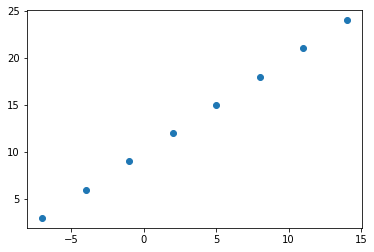

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
# This is the relationship between X and y. Our model will have to try and learn this
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2022-02-12 10:06:01.730180: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-12 10:06:01.730329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn out NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

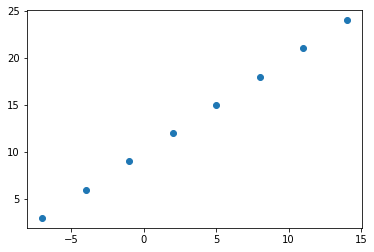

In [12]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting the model - letting the model try to find patterns between X & y (features and labels).

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descend
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 142ms/step - loss: 14.1284 - mae: 14.1284
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 13.9959 - mae: 13.9959
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 13.8634 - mae: 13.8634
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 13.7309 - mae: 13.7309
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 13.5984 - mae: 13.5984


2022-02-12 10:06:02.070335: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-12 10:06:02.168967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

2022-02-12 10:06:02.337286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[-0.02746051]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more data to learn on)

In [16]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 102ms/step - loss: 18.6057 - mae: 18.6057
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 18.3244 - mae: 18.3244
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 18.0432 - mae: 18.0432
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 17.7619 - mae: 17.7619
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 17.4807 - mae: 17.4807
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 17.1994 - mae: 17.1994
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 16.9182 - mae: 16.9182


2022-02-12 10:06:02.468190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 16.6369 - mae: 16.6369
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 16.3557 - mae: 16.3557
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 16.0744 - mae: 16.0744
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 15.7932 - mae: 15.7932
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 15.5119 - mae: 15.5119
Epoch 13/100
1/1 [==============================] - 0s 4ms/step - loss: 15.2307 - mae: 15.2307
Epoch 14/100
1/1 [==============================] - 0s 4ms/step - loss: 14.9494 - mae: 14.9494
Epoch 15/100
1/1 [==============================] - 0s 4ms/step - loss: 14.7263 - mae: 14.7263
Epoch 16/100
1/1 [==============================] - 0s 5ms/step - loss: 14.5938 - mae: 14.5938
Epoch 17/100
1/1 [==============================] - 0s 4ms/step - loss: 14.4613 - mae: 14.4613
Epoch 18/100
1/1 [==============================] - 

In [17]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Let's see if our model's prediction has improved
model.predict([17.0])

2022-02-12 10:06:03.198265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[29.536253]], dtype=float32)

In [19]:
# Let's see if we can make another change to improve our model

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


2022-02-12 10:06:03.349518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 160ms/step - loss: 13.6434 - mae: 13.6434
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9011 - mae: 12.9011
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.1557 - mae: 12.1557
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4070 - mae: 11.4070
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6540 - mae: 10.6540
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.8949 - mae: 9.8949
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1275 - mae: 9.1275
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3493 - mae: 8.3493
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5570 - mae: 7.5570
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.7473 - mae: 6.7473
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 6.6650 

In [20]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's try to make a prediction
model.predict([17.0])

2022-02-12 10:06:04.194037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[27.898079]], dtype=float32)

## Evaluating a model

In practice a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```


When it comes to evaluation.. there are 3 words you should memorize:

> "Visualize, visualize, visualize"


It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - How do the model's predictions line up against the ground truth?
  

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

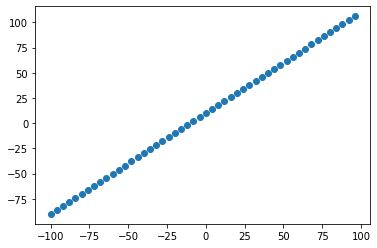

In [24]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y);

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have avaliavle.
* **Validation set** - the model gets tuned on this data, which typically is 10-15% of the data avaliable.
* **Test set** - the model gets evaluate on this data to test what it has learned. This set is typically 10-15% of the total data avaliable.

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40]  # first 40 are training samples (80%)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20%)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

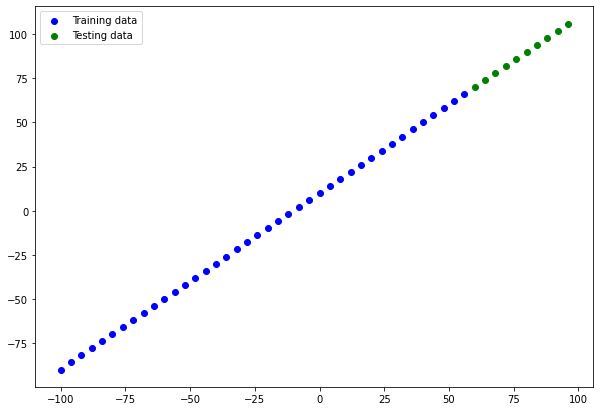

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="blue", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="green", label="Testing data")
# Show a legend
plt.legend();

In [28]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [29]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [89]:
# Let's create model which builds automatically by defining the input shape in the first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential(name="model_1")
model.add(tf.keras.layers.Dense(20, input_shape=[1], name="input_layer"))
model.add(tf.keras.layers.Dense(20, name="input_layer_2"))
model.add(tf.keras.layers.Dense(1, name="output_layer"))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

/Users/hartlden/Projects/introduction-to-tensorflow/env/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [90]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 20)                40        
                                                                 
 input_layer_2 (Dense)       (None, 20)                420       
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - The parameters aren't update during training. This is typical when you bring in parameters from other models during **transfer learning**.

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to Deep Learning video.

🛠 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters.

In [91]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

2022-02-12 10:09:37.959891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


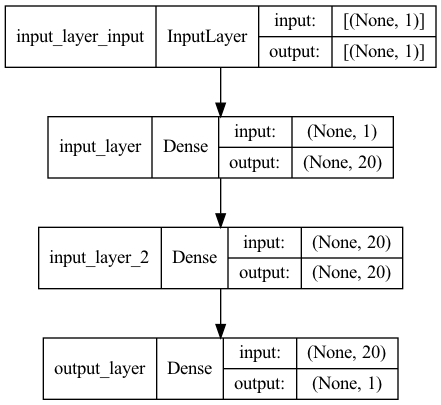

In [92]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualize our models's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [93]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

2022-02-12 10:09:41.522749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[ 69.670715],
       [ 73.64897 ],
       [ 77.62724 ],
       [ 81.6055  ],
       [ 85.58376 ],
       [ 89.56202 ],
       [ 93.54028 ],
       [ 97.518555],
       [101.49682 ],
       [105.475075]], dtype=float32)

In [94]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [95]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testind data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

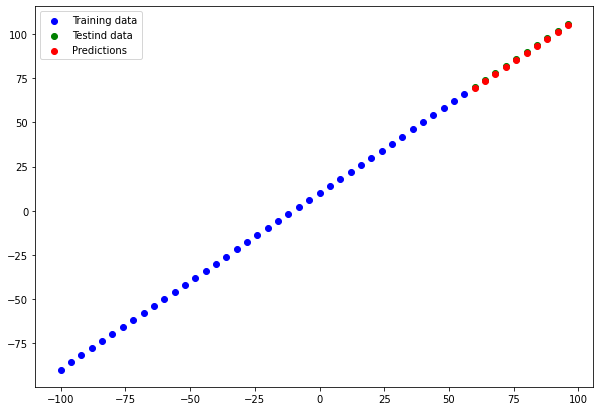

In [96]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, two of the main metrics are:
* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"
* **MSE** - mean squared error, "square the average errors"
  

In [101]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 13ms/step - loss: 0.4271 - mae: 0.4271


[0.42710572481155396, 0.42710572481155396]

In [142]:
# Calculate the mean absolute error (my version)
def my_mae(y_test=y_test, y_pred=y_pred):
    mae = 0
    for index, value in np.ndenumerate(y_pred):
        mae = mae + np.abs(tf.cast(y_test[index[0]], dtype=tf.float32) - value)
    return mae/len(y_test)

In [143]:
my_mae(y_test, y_pred)

0.427105712890625

In [140]:
# Calculate the mean absolute error (Daniel's version)
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae, y_test.shape, y_pred.shape # This is wrong because y_test and y_pred are in different shapes

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([18.329285, 15.080823, 12.623654, 10.957801, 10.083247, 10.      ,
        10.708056, 12.207422, 14.498092, 17.580061], dtype=float32)>,
 TensorShape([10]),
 (10, 1))

In [141]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.42710572>

In [144]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.18631755>

In [167]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))
    
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ....
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [163]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential(name="model_1")
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 45.2757 - mae: 45.2757
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 14.7306 - mae: 14.7306
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 13.8314 - mae: 13.8314
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 7.5791 - mae: 7.5791
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0204 - mae: 12.0204
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.3012 - mae: 9.3012
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.4637 - mae: 8.4637
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0439 - mae: 9.0439
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.4674 - mae: 18.4674
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9626 - mae: 9.9626
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - lo

2022-02-12 11:07:30.711774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 15/100
2/2 [==============================] - 0s 5ms/step - loss: 11.6568 - mae: 11.6568
Epoch 16/100
2/2 [==============================] - 0s 5ms/step - loss: 8.4756 - mae: 8.4756
Epoch 17/100
2/2 [==============================] - 0s 5ms/step - loss: 13.4774 - mae: 13.4774
Epoch 18/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2639 - mae: 11.2639
Epoch 19/100
2/2 [==============================] - 0s 6ms/step - loss: 18.2680 - mae: 18.2680
Epoch 20/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9759 - mae: 14.9759
Epoch 21/100
2/2 [==============================] - 0s 5ms/step - loss: 10.8569 - mae: 10.8569
Epoch 22/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6086 - mae: 8.6086
Epoch 23/100
2/2 [==============================] - 0s 5ms/step - loss: 9.7150 - mae: 9.7150
Epoch 24/100
2/2 [==============================] - 0s 5ms/step - loss: 10.9694 - mae: 10.9694
Epoch 25/100
2/2 [==============================] - 0s 

2022-02-12 11:13:57.111269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


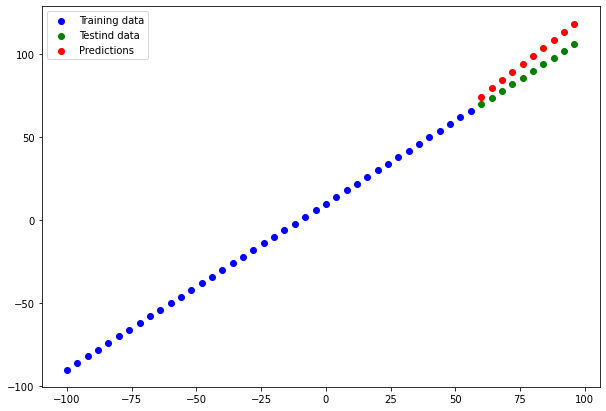

In [170]:
# Make and plot predictions with for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [168]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.584009>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.172775>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [189]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 37.7641 - mse: 2035.7916
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 26.8380 - mse: 933.5803
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 32.1597 - mse: 1543.4480
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 26.8132 - mse: 1051.9125
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.6635 - mse: 267.2861
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.6777 - mse: 159.2467
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0280 - mse: 147.3315
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0402 - mse: 152.8685
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 39.8903 - mse: 2499.0798
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.3607 - mse: 1053.6687
Epoch 11/100
2/2 [=========================

2022-02-12 11:32:35.251974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 13/100
2/2 [==============================] - 0s 5ms/step - loss: 16.7568 - mse: 386.6826
Epoch 14/100
2/2 [==============================] - 0s 5ms/step - loss: 25.5069 - mse: 1012.4545
Epoch 15/100
2/2 [==============================] - 0s 5ms/step - loss: 17.4168 - mse: 419.3784
Epoch 16/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9934 - mse: 124.5311
Epoch 17/100
2/2 [==============================] - 0s 5ms/step - loss: 18.4537 - mse: 454.6596
Epoch 18/100
2/2 [==============================] - 0s 5ms/step - loss: 11.3192 - mse: 197.0930
Epoch 19/100
2/2 [==============================] - 0s 5ms/step - loss: 13.8859 - mse: 299.9961
Epoch 20/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1691 - mse: 145.9364
Epoch 21/100
2/2 [==============================] - 0s 5ms/step - loss: 17.2074 - mse: 418.8426
Epoch 22/100
2/2 [==============================] - 0s 5ms/step - loss: 15.4457 - mse: 328.4963
Epoch 23/100
2/2 [======================

2022-02-12 11:32:36.985730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


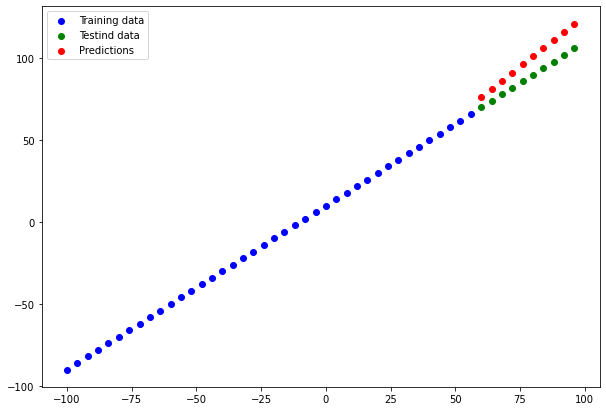

In [190]:
# Make and plot predictions with model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [191]:
# Calculate mae and mse for model_2
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.800007>,
 <tf.Tensor: shape=(), dtype=float32, numpy=124.55125>)

**Build `model_3`**

* 2 dense layers, trained for 500 epochs

In [192]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(loss=tf.keras.metrics.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. 
model_3.fit(tf.expand_dims(X_test, axis=-1), y_test, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 190ms/step - loss: 88.9613 - mae: 88.9613
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 103.8929 - mae: 103.8929
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 88.1473 - mae: 88.1473
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 58.5797 - mae: 58.5797
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 6.6556 - mae: 6.6556
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 83.4822 - mae: 83.4822
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 73.4750 - mae: 73.4750
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 41.9983 - mae: 41.9983
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 57.7078 - mae: 57.7078
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 80.9238 - mae: 80.9238
Epoch 11/500
1/1 [==============================] - 0s 7m

2022-02-12 11:34:52.743006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 13/500
1/1 [==============================] - 0s 7ms/step - loss: 136.2260 - mae: 136.2260
Epoch 14/500
1/1 [==============================] - 0s 5ms/step - loss: 77.1067 - mae: 77.1067
Epoch 15/500
1/1 [==============================] - 0s 6ms/step - loss: 53.5816 - mae: 53.5816
Epoch 16/500
1/1 [==============================] - 0s 5ms/step - loss: 20.9391 - mae: 20.9391
Epoch 17/500
1/1 [==============================] - 0s 6ms/step - loss: 82.6738 - mae: 82.6738
Epoch 18/500
1/1 [==============================] - 0s 5ms/step - loss: 71.2434 - mae: 71.2434
Epoch 19/500
1/1 [==============================] - 0s 6ms/step - loss: 35.0463 - mae: 35.0463
Epoch 20/500
1/1 [==============================] - 0s 5ms/step - loss: 79.6270 - mae: 79.6270
Epoch 21/500
1/1 [==============================] - 0s 6ms/step - loss: 79.8159 - mae: 79.8159
Epoch 22/500
1/1 [==============================] - 0s 5ms/step - loss: 62.2312 - mae: 62.2312
Epoch 23/500
1/1 [==============================

2022-02-12 11:35:28.869509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


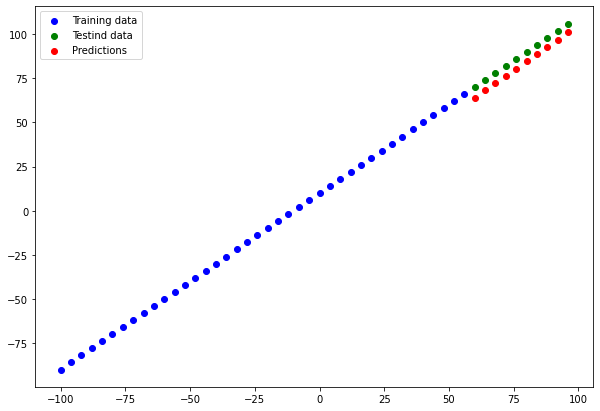

In [193]:
# Predict and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [194]:
# Calculate mae and mse for model_3
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=5.4468246>,
 <tf.Tensor: shape=(), dtype=float32, numpy=29.78449>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results

Let's compare the results of our models.

In [196]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.584009,80.172775
1,model_2,10.800007,124.551247
2,model_3,5.446825,29.784491


Looks like `model_3` performed the best...

> 🔑 One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, you will get closer to figuring out what does work. Remember the machine learning practioner's motto: "**experiment, experiment, experiment**".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there a tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard). wandb.com

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our models too:
1. The SavedModel format
2. The HDF5 format

In [198]:
# SaveModel format
model_3.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


2022-02-12 11:56:25.039082: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [199]:
# HDF5 format
model_3.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [200]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [201]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Looks like it's the same model!

In [202]:
# Compare model_3 predictions with SavedModel format model predictions
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_3_preds == loaded_SavedModel_format_preds

2022-02-12 12:07:36.920469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [203]:
mae(y_true=y_test, y_pred=model_3_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [205]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [206]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [209]:
# Check to see if loaded .h5 model predictions match model_3
model_3_preds = model_3.predict(X_test)
model_3_preds == loaded_h5_model.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [210]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [213]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [217]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [229]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X.shape, y.shape

((1338, 11), (1338,))

In [231]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [232]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [230]:
# Create training and test sets
X_train = X[:int(.8*len(X))]
y_train = y[:int(.8*len(y))]

X_test = X[int(.8*len(X)):]
y_test = y[int(.8*len(y)):]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [238]:
# Alternative way to create training and test set using Sklearn's train_test_split
# This is even better because it also randomizes the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [241]:
# Build a basic neural network

# Set random seed
tf.random.set_seed(42)

# 1. Build the model
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
insurance_model.compile(loss=tf.keras.metrics.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 8571.2598 - mae: 8571.2598


2022-02-12 12:50:38.793246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7888.5137 - mae: 7888.5137
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7608.3857 - mae: 7608.3857
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7824.0713 - mae: 7824.0713
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7657.6240 - mae: 7657.6240
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7657.9302 - mae: 7657.9302
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7563.0215 - mae: 7563.0215
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7739.4204 - mae: 7739.4204
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7574.5195 - mae: 7574.5195
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7747.5933 - mae: 7747.5933
Epoch 11/100
34/34 [==============================] - 0s 4ms/step - loss: 7529.0166 - mae: 7529.016

In [242]:
# Check the results of the insurace_model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8921.9883 - mae: 8921.9883


2022-02-12 12:53:30.335657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[8921.98828125, 8921.98828125]

In [245]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model ins't performing too well.. Let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)

In [249]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
insurance_model_2 = tf.keras.Sequential()
insurance_model_2.add(tf.keras.layers.Dense(100))
insurance_model_2.add(tf.keras.layers.Dense(10))
insurance_model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
21/34 [=================>............] - ETA: 0s - loss: 13335.7754 - mae: 13335.7754

2022-02-12 13:02:12.595235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 5ms/step - loss: 13314.8184 - mae: 13314.8184
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13180.2998 - mae: 13180.2998
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 12895.2188 - mae: 12895.2188
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 12317.1621 - mae: 12317.1621
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 11305.8633 - mae: 11305.8633
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9901.3398 - mae: 9901.3398
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8479.1660 - mae: 8479.1660
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7635.1284 - mae: 7635.1284
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7452.4863 - mae: 7452.4863
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7427.5771 - mae: 7427.5771
E

In [250]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 4981.3589 - mae: 4981.3589


2022-02-12 13:02:49.107101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[4981.35888671875, 4981.35888671875]

In [252]:
# Compare to first model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8921.9883 - mae: 8921.9883


[8921.98828125, 8921.98828125]

In [255]:
# Set random seed
tf.random.set_seed(42)

# 1. Build the model
insurance_model_3 = tf.keras.Sequential()
insurance_model_3.add(tf.keras.layers.Dense(100))
insurance_model_3.add(tf.keras.layers.Dense(10))
insurance_model_3.add(tf.keras.layers.Dense(1))


# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
19/34 [===============>..............] - ETA: 0s - loss: 13212.8057 - mae: 13212.8057

2022-02-12 13:07:15.827747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 7ms/step - loss: 13314.8184 - mae: 13314.8184
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13180.2998 - mae: 13180.2998
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12895.2188 - mae: 12895.2188
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 12317.1621 - mae: 12317.1621
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 11305.8633 - mae: 11305.8633
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 9901.3398 - mae: 9901.3398
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 8479.1660 - mae: 8479.1660
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 7635.1284 - mae: 7635.1284
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 7452.4863 - mae: 7452.4863
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 7427.5771 - mae: 7427.5771
E

In [256]:
# Evaluate the even bigger model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3506.1880 - mae: 3506.1880


2022-02-12 13:08:03.686244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[3506.18798828125, 3506.18798828125]

In [257]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8921.9883 - mae: 8921.9883


2022-02-12 13:08:11.723460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[8921.98828125, 8921.98828125]

Text(0.5, 0, 'epochs')

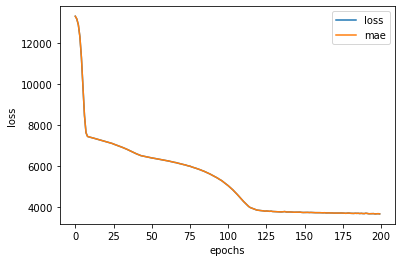

In [258]:
# Plot history (also knows as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for?

It depends. Really .. it depends on the problem you're working on. However, many people have asked this question before ... so TensorFlow has a solution! It's called the EarlyStoppingCallback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurace = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [269]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "children", "bmi"]), # turn all values in those columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurace.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [270]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [275]:
X_train_normal[0]

array([0.60869565, 0.4       , 0.10734463, 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [276]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.

Now let's build a neural network on it and see how it does.

In [280]:
# Build a neural network model to fit on our normalized data

# Set random seed
tf.random.set_seed(42)

# 1. Build the model
norm_model = tf.keras.Sequential()
norm_model.add(tf.keras.layers.Dense(100))
norm_model.add(tf.keras.layers.Dense(10))
norm_model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
norm_model.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["mae"])

# 3. Fit the model
history = norm_model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
21/34 [=================>............] - ETA: 0s - loss: 13348.3057 - mae: 13348.3057

2022-02-12 13:36:25.714076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 5ms/step - loss: 13344.3037 - mae: 13344.3037
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13337.2695 - mae: 13337.2695
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 13319.0645 - mae: 13319.0645
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 13279.2764 - mae: 13279.2764
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 13206.8926 - mae: 13206.8926
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 13090.8779 - mae: 13090.8779
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 12920.7578 - mae: 12920.7578
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 12686.2549 - mae: 12686.2549
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 12376.9922 - mae: 12376.9922
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 11986.9902 - mae: 11

In [281]:
# Evaluate our insurance model trained on the normalized data
norm_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3174.2112 - mae: 3174.2112


2022-02-12 13:37:21.906181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[3174.211181640625, 3174.211181640625]